# Day1ニューラルネットワーク

## 全体像

### NNでできること

### 回帰
- 結果予想
売上予想、株価予想
- ランキング
順位予想
### 分類
- 画像分類など

NNでは回帰と分類どちらも行うことが可能。

## 入力層～中間層

入力：$\boldsymbol{x} = \{x_1, x_2, x_3, x_4 \}$ \
重み：$\boldsymbol{W} = \{w_1, w_2, w_3, w_4 \}$ \
バイアス：$b$ \
とするとき、総入力$u$は、
$$
 u = \boldsymbol{W} \boldsymbol{x} + b
$$

と表され、中間層からの出力は総入力$u$を活性化関数で変換した
$$
 z = f(u)
$$
となる。多層のニューラルネットの場合は、この出力$z$が次の中間層への入力となる。

## 活性化関数

ニューラルネットワークにおいて、次の層への出力の大きさを決める非線形の関数。\
入力された値に応じて、次の層への信号のON/OFFや強弱を決める働きをする。

【中間層用の活性化関数の種類】
- ステップ関数\
閾値を超えたときに発火する関数、1もしくは0を出力する。パーセプトロンで使用されたが、線形分離可能なものしか学習できなかった。


- シグモイド関数\
0～1の値を緩やかにとる関数。信号の強弱を伝えられる。\
大きな入力に対しては、出力の変化が緩やかなため勾配消失問題を起こすことがある。


- Relu関数\
現状、中間層の活性化関数として最も使用されている関数。
勾配消失問題を回避すること、スパース化に貢献することで良い結果が得られている


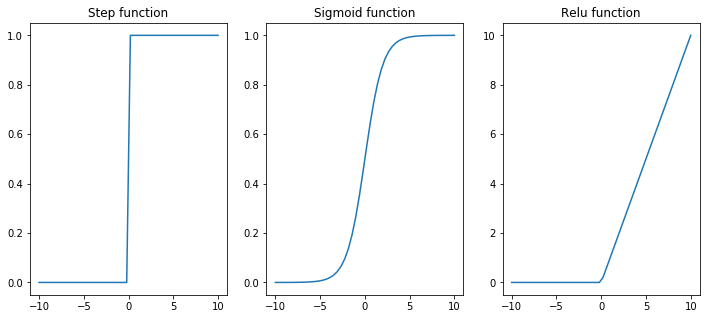

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def step_funciton(x):
    return (x > 0).astype(np.int)
    
def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(x,0)
x = np.linspace(-10,10,50)

fig, ax = plt.subplots(1,3, figsize=(12,5))
ax[0].plot(x,step_funciton(x))
ax[1].plot(x,sigmoid(x))
ax[2].plot(x,relu(x))

ax[0].set_title("Step function")
ax[1].set_title("Sigmoid function")
ax[2].set_title("Relu function")
plt.show()

## 出力層

【出力層の役割】\
分類問題であれば入力データがそれぞれのクラスに属する確率を、回帰問題であれば入力に対する予測値（連続値）を出力すること。

【誤差関数】\
NN全体の重みを学習するために用いられる関数。\
訓練データの答えと出力層から出力された結果を比較して誤差を計算する。\
その誤差を小さくするように重みを更新していく。

【出力層の活性化関数】\
回帰問題の場合は出力層はそのままの値を出力するが、分類の問題の場合は確率に変換する必要がある。（出力の大きさの比率はそのままで）

### 出力層の活性化関数と誤差関数の種類

対称とする問題によって出力層の活性化関数と誤差関数の組み合わせが決まる。

| |回帰|二値分類|多クラス分類|
| :---:| :---: | :---: | :---: | 
|活性化関数|恒等写像|シグモイド関数|ソフトマックス関数|
|誤差関数| 二乗誤差|交差エントロピー|交差エントロピー|

## 勾配降下法

NNでは学習を通して、誤差を最小にするようなパラメータを求めることで、ネットワークを作成することを目的としている。誤差を最小化するようなパラメータを求めるために勾配降下法を用いてパラメータを最適化する。

### 勾配降下法の種類

- 勾配降下法\
普通の勾配降下法
$$
 w^{(t+1)} = w^{(t)} - \epsilon \nabla E \\
 \nabla E = \frac{\partial{E}}{\partial{w}}
$$
で重みを更新していく。$\epsilon$は学習率と呼ばれ自分で設定する値、大きすぎると発散し、小さすぎると学習が進まない。このときの誤差関数$E$は全サンプルの平均誤差なので、1回の学習（1回の重みの更新毎に）で全データを読み込む必要があり、学習コストが大きくなる。


- 確率的勾配降下法\
重みの更新に使用するデータをランダムに選択したデータ（基本は一つのデータ）の誤差を用いて更新を行う。これにより、計算コストを削減でき、局所極小解への収束リスクを低減できる。また、オンライン学習が可能。\
※オンライン学習：データが入って来るたびに都度パラメータを更新し、学習すること。

$$
 w^{(t+1)} = w^{(t)} - \epsilon \nabla E_n \\
 \nabla E = \frac{\partial{E_n}}{\partial{w}}
$$

- ミニバッチ勾配降下法\
確率的勾配降下法を改良したもの、訓練データをランダムに分割し、その分割したデータの集合を用いて学習する。
ある程度まとまったデータで学習していくので、通常の勾配降下法に比べて学習コストを削減できる。また、スレッドの並列化などによる計算資源の有効活用も可能。

$$
 w^{(t+1)} = w^{(t)} - \epsilon \nabla E_t \\
 E_t = \frac{1}{N_t} \sum_{n \in D_t} E_n \\
 N_t = |D_t|
$$

## 誤差勾配の計算（誤差逆伝搬）

重みを更新をするためには、誤差関数の勾配を計算する必要がある。\
### 【数値微分】
微小な数値hを使って、疑似的に微分を計算する方法。
各パラメータ$w_m$についてそれぞれ$E(w_m\pm h)$を計算しなければならず、計算量が多くなる。\
※できないわけではないが現実的ではない。

$$
 \frac{\partial E}{\partial w_m} \approx \frac{E(w_m + h) - E(w_m -h)}{2h}
$$

### 【誤差逆伝搬】

算出された誤差を出力側から順に微分した値を前の層へ伝搬し、各パラメータでの微分値を解析的に計算する手法。
微分の連鎖律を用いて計算する。
例えば下の図では、$w_1$に対する$E$の偏微分は、
$$
 \frac{\partial E}{\partial y}\frac{\partial y}{\partial w_1}
$$
と計算でき,$w_2$についても同様の計算で求められる。このように計算することで、数値微分のときとは異なり、すべての$w$の変化に対して$E$の変化量を計算する必要がなくなり（Eについては$\frac{\partial E}{\partial y}$を計算するだけでいい）、各ノードの入力に対するノードの出力の変化から各パラーメータに対する誤差の変化量を求めることができる。

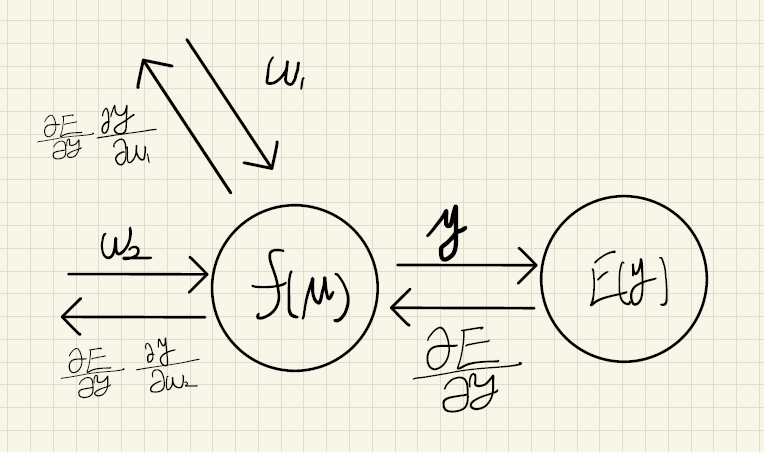

## 確認テスト

【確認テスト①】\
1)ディープラーニングが結局何をしようとしているか\
　⇒多数の中間層を持つニューラルネットワークを用いた、入力値を目的の値に変換する数学モデルを構築すること。
2)何の値を最適化するのが最終目的か\
　⇒重みとバイアス

【確認テスト②】\
入力層:2ノード1層、中間層：3ノード2層、出力層：1ノード1層のネットワークを書け

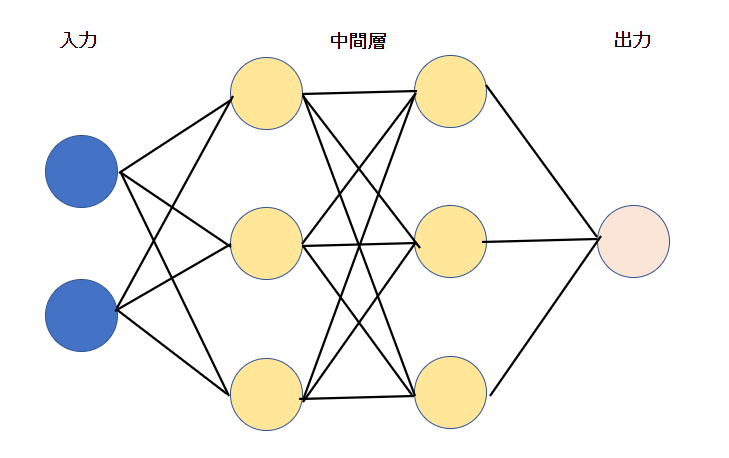

【確認テスト③】
総入力$u$をPythonのコードで書け

In [23]:
def net_sum(W, x, b):
    return np.dot(W, x) + b

【確認テスト④】
1-1のファイルから中間層の出力を定義しているソースを抜き出せ

z2 = functions.relu(u2)

【確認テスト⑤】線形と非線形の違いを図にして、簡単に説明せよ

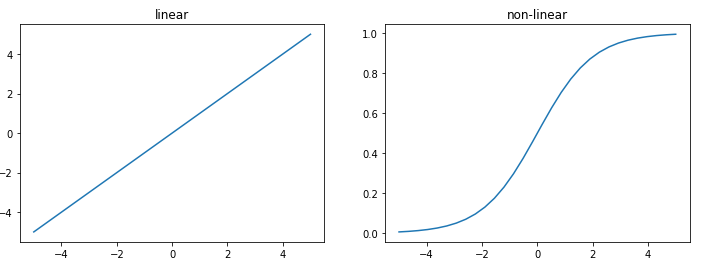

【確認テスト⑥】全結合NN
配布されたソースコードより、該当する箇所（シグモイド関数による出力箇所)を抜き出せ \

z = functions.sigmoid(u)

【確認テスト⑦】
誤差関数の二乗平方和の二乗する理由と1/2の係数の意味を述べよ\

・2乗の意味\
各データの誤差を計算すると正と負の値が発生する、単純に足し合わせると全体の誤差を正確に表すことができないため、二乗して正の値にしている。

・1/2の意味\
誤差逆伝搬の計算の際に、誤差関数を微分するがその際に出る係数２を打ち消すため、計算しやすさのための係数であり本質的に意味のあるものではない。

【確認テスト⑧】ソフトマックス関数のコードの処理を説明せよ（コメントアウトで説明する）

In [ ]:
def softmax(x):
    if x.ndim == 2: #入力がバッチ単位で来ている場合の分岐
        x = x.T #入力データを転置
        x = x - np.max(x, axis=0) #最大値を引くことでオーバーフロー対策、1行上で転置しているので縦方向が一つのデータのまとまり
        y = np.exp(x) / np.sum(np.exp(x), axis=0) #ソフトマックス関数の計算
        return y.T

    x = x - np.max(x) #xの値が大きくなるとexp(x)は非常に大きな値をとりうる。最大値を引くことでオーバーフロー対策している
    return np.exp(x) / np.sum(np.exp(x))

【確認テスト⑨】　交差エントロピーのコードを1行ずつ処理を説明せよ

In [170]:
def cross_entropy_error(d, y):
    if y.ndim == 1: #入力されるデータが一つの場合、データの形を成型する（ミニバッチを想定しているため）
        d = d.reshape(1, d.size) 
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size: #yはOnehotの形式なので、サイズが同じならdもonehotで与えられている。
        d = d.argmax(axis=1) #各データのラベルの番号を取得
             
    batch_size = y.shape[0] #バッチサイズを取得
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size #クロスエントロピーの計算

最後の出力の部分については、
y[np.arange(batch_size),d] で正解ラベルの分だけ予測値から取り出している。1e-7は発散防止

【確認テスト⑩】勾配降下法の該当するソースコードを抜き出せ（1-2backpropagationから）

network[key]  -= learning_rate * grad[key]

【確認テスト⑩】オンライン学習とは何か

データが入ってくるたびにその都度パラメータを更新していくこと。

バッチ学習は一度にすべてのデータを使ってパラメータを更新する

【確認テスト⑪】誤差逆伝搬での不要な再帰的処理を避けるために、計算結果を保持しているソースコードを抽出せよ。

In [ ]:
delta2 = functions.d_sigmoid_with_loss(d, y)
delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

【確認テスト⑫】スライド中の空欄に該当するソースコードを探せ

delta2 = functions.d_mean_squared_error(d, y)\
grad['W2'] = np.dot(z1.T, delta2)

## code実習演習

In [31]:
import numpy as np

### 順伝搬（単層・単ユニット）

In [34]:
#入力
x = np.array([1,2])
#重み
W = np.array([[0.1],[0.2]])

#バイアス
b =0.5

#総入力
u = np.dot(x,W)

#中間層の出力
z = sigmoid(u)

### 順伝搬（単層、複数ユニット）

In [138]:
#隠れ層のユニット数
hidden_units = 3

#入力
x = np.array([1.0, 5.0, 2.0, -1.0])

#重み（0~1で初期化）
W = np.random.rand(x.shape[0], hidden_units)

#バイアス
b = np.random.rand(hidden_units)

#そう入力
u = np.dot(x, W)

#中間層の出力
z = sigmoid(u)

print("z : {}".format(z))

z : [0.95150085 0.86065924 0.98679596]


##### 重みのサイズについて
入力の要素数が$m$, 隠れ層のユニット数を$n$とするとき、
重みのサイズは$m \times n$となる。

### 順伝搬（3層,複数ユニット）

In [53]:
#入力
x = np.array([1.0, 2.0, 3.0])

#3層
def init_network(input_size):
    network = {}
    
    #入力～1層目の重み
    network["W1"] = np.random.rand(input_size, 3)
    #1層～２層の重み
    network["W2"] = np.random.rand(3, 2)
    
    #2層～3層の重み
    network["W3"] = np.random.rand(2,2)
    
    #各中間層でのバイアス
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([1, 2])
    
    return network
    
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    return y

In [54]:
network = init_network(x.shape[0])
forward(network, x)

array([3.52299102, 8.0110835 ])

### 多クラス分類（2-3-4ネットワーク）

In [91]:
def init_network():
    network = {}
    
    network["W1"] = np.random.rand(2,3)
    network["W2"] = np.random.rand(3,4)
    
    network["b1"] = np.random.rand(3)
    network["b2"] = np.random.rand(4)
    return network
    
def forward(network, x):
    W1, W2 = network["W1"], network["W2"]
    b1, b2 = network["b1"], network["b2"]
    
    u1 = np.dot(x,W1) + b1
    z1 = relu(u1)
    
    u2 = np.dot(z1, W2) + b2
    
    y = softmax(u2)
    
    return y

def softmax(x):
    if x.ndim == 2: #バッチ処理の対応
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y

    x = x - np.max(x) 
    return np.exp(x) / np.sum(np.exp(x))

In [92]:
network = init_network()
x = np.array([1,2])
forward(network,x)

array([0.29150008, 0.39913893, 0.18616225, 0.12319875])

### 回帰（3-5-4ネットワーク）

In [98]:
def init_network():
    network = {}
    
    network["W1"] = np.random.rand(3,5)
    network["W2"] = np.random.rand(5,4)
    
    network["b1"] = np.random.rand(5)
    network["b2"] = np.random.rand(4)
    
    return network


def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    
    u1 = np.dot(x, W1) + b1
   
    z1 = relu(u1)
    
    u2 = np.dot(z1, W2) + b2
    
    y = u2
    
    return y

In [99]:
x = np.array([1,2,3])
network = init_network()
forward(network,x)

array([11.244963  ,  8.69185832,  8.41759102,  9.51894002])

### 誤差逆伝搬実装(2-3-2ネットッワーク）

In [133]:
#ネットワーク初期化
def init_network():
    
    network = {}
    
    network["W1"] = np.random.rand(2,3)
    network["W2"] = np.random.rand(3,2)
    
    network["b1"] = np.random.rand(3)
    network["b2"] = np.random.rand(2)
    
    return network

#順伝搬
def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    u1 = np.dot(x, W1) + b1
    z1 = relu(u1)
    u2 = np.dot(z1, W2) + b2
    y = softmax(u2)
    
    return y, z1

def backward(x, d, z1, y):
    
    grad = {}
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    #  出力層でのデルタ
    delta2 = sigmoid_with_loss(d, y)
    #  b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    #  W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    #  中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    #  W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    return grad
    
def sigmoid_with_loss(d,y):
    return y-d

def diff_sigmoid(y):
    return y*(1-y)

def d_relu(x):
    return np.where( x > 0, 1, 0)

def relu(x):
    return np.maximum(0, x)


def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

In [134]:
x  = np.array([[2.1, 3.0]])
d = np.array([[0, 1]])
learning_rate = 0.01
network =  init_network()
y, z1 = forward(network, x)

grad = backward(x,d,z1,y)

In [136]:
for key in ('W1', 'W2', 'b1', 'b2'):
    network[key]  -= learning_rate * grad[key]

network

{'W1': array([[0.87962369, 0.395049  , 0.72358235],
        [0.82272632, 0.93971761, 0.18277854]]),
 'W2': array([[0.47364817, 0.23006489],
        [0.13527083, 0.8826519 ],
        [0.37879458, 0.66129372]]),
 'b1': array([0.6219376 , 0.94185702, 0.3556694 ]),
 'b2': array([0.22522438, 0.61844914])}

### 確率的勾配降下法

ランダムにサンプルを選択する機能とそのサンプルでの誤差勾配を計算する機能が必要

In [147]:
def init_network():
    network = {}
    nodesNum = 10
    
    network["W1"] = np.random.rand(2, nodesNum)
    network["W2"] = np.random.rand(nodesNum)
    
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()
    
    return network

def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2
    
    return z1, y


def backward(x,d,z1,y):
    grad = {}
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    delta2 = d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    return grad
    
def d_mean_squared_error(d, y):
    if type(d) == np.ndarray:
        batch_size = d.shape[0]
        dx = (y - d)/batch_size
    else:
        dx = y - d
    return dx
    
def d_sigmoid(x):
    dx = (1.0 - sigmoid(x)) * sigmoid(x)
    return dx

def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2

In [143]:
#サンプルデータ
def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]
for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])

In [146]:
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()

# データのランダム抽出(epochの回数だけパラメータを更新するのでエポック数分のデータをランダムに選択)
random_datasets = np.random.choice(data_sets, epoch)


In [148]:
#学習


for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = mean_squared_error(d, y)
    losses.append(loss)

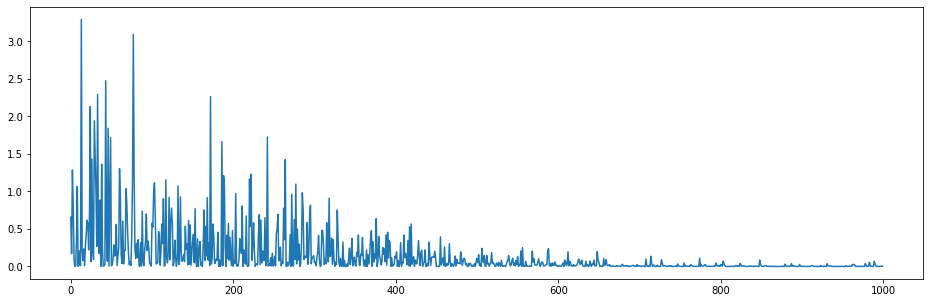

In [151]:
import matplotlib.pyplot as plt
lists = range(epoch)

plt.figure(figsize=(16,5))
plt.plot(lists, losses, '-')
# グラフの表示
plt.show()

学習ごとにコストが小さくなっていることがわかる。